In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from numpy import array
from keras import models
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l2
from keras.optimizers import SGD

In [ ]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("/content/PPG.csv")

X = df[['irled', 'redled', 'heartrate', 'oxygen']]
y = df['diastole']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[220757, 180065, 122, 91]])

print(predictedCO2)

[70.35962284]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
url = 'PPG.csv'
df = pd.read_csv(url)
df = df.drop_duplicates()
df

,irled,redled,heartrate,oxygen,diastole
0,220710,188788,103,93,63
1,220757,188853,102,93,63
2,220760,188740,102,94,63
3,220785,188762,101,94,63
4,220700,188957,101,95,63
...,...,...,...,...,...
695,234290,193137,73,97,75
696,233823,192889,72,97,75
697,234629,193173,72,97,75
698,234321,193016,71,96,75


In [ ]:
df = df.reset_index(drop=True)

In [ ]:
#df = df.drop(columns=['Open Time', 'Ignore', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume', 'TB Quote Volume'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   irled      692 non-null    int64
 1   redled     692 non-null    int64
 2   heartrate  692 non-null    int64
 3   oxygen     692 non-null    int64
 4   diastole   692 non-null    int64
dtypes: int64(5)
memory usage: 27.2 KB


In [ ]:
df.describe()

,irled,redled,heartrate,oxygen,diastole
count,692.000000,692.000000,692.000000,692.000000,692.000000
mean,219626.893064,183233.593931,91.177746,95.764451,74.485549
std,15904.209549,16174.440395,14.711757,1.680141,10.584431
min,170563.000000,146209.000000,62.000000,90.000000,60.000000
25%,211666.250000,167025.000000,81.000000,95.000000,67.000000
50%,221455.000000,190295.000000,92.000000,96.000000,72.000000
75%,228589.000000,196364.750000,99.000000,97.000000,82.000000
max,241813.000000,202086.000000,130.000000,99.000000,94.000000


In [ ]:
df.isnull().sum()

irled        0
redled       0
heartrate    0
oxygen       0
diastole     0
dtype: int64

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.shape

(692, 5)

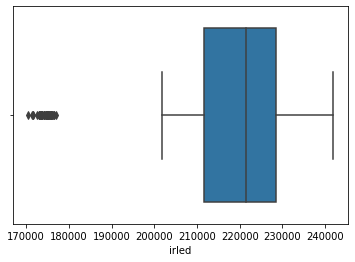

In [ ]:
sns.boxplot(x=df['irled'])

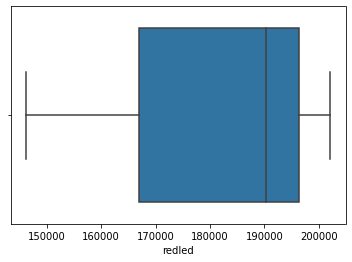

In [ ]:
sns.boxplot(x=df['redled'])

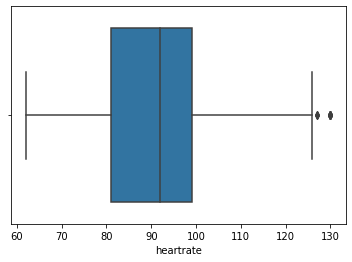

In [ ]:
sns.boxplot(x=df['heartrate'])

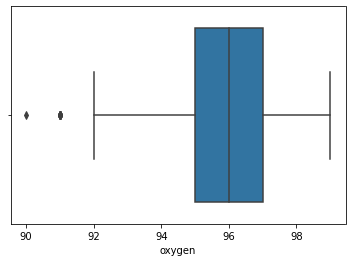

In [ ]:
sns.boxplot(x=df['oxygen'])

In [ ]:
num_var = ['irled','redled','heartrate','oxygen']
for i in num_var:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df[i] = np.where(df[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),df[i])
    df[i] = np.where(df[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),df[i])

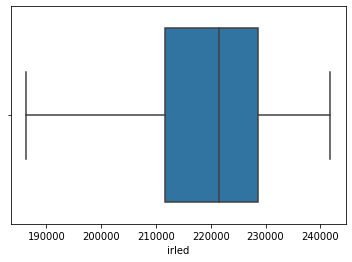

In [ ]:
sns.boxplot(x=df['irled'])

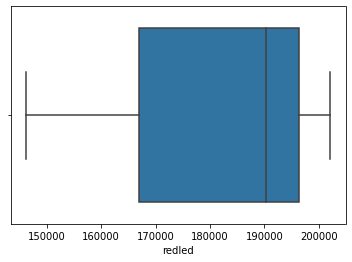

In [ ]:
sns.boxplot(x=df['redled'])

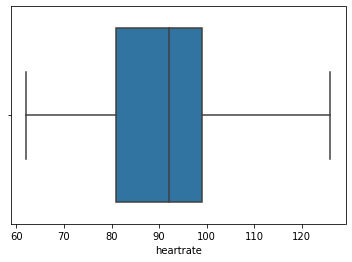

In [ ]:
sns.boxplot(x=df['heartrate'])

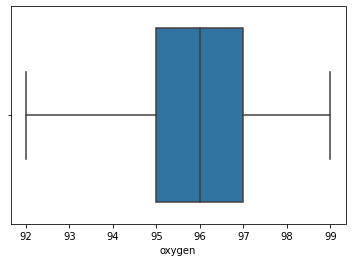

In [ ]:
sns.boxplot(x=df['oxygen'])

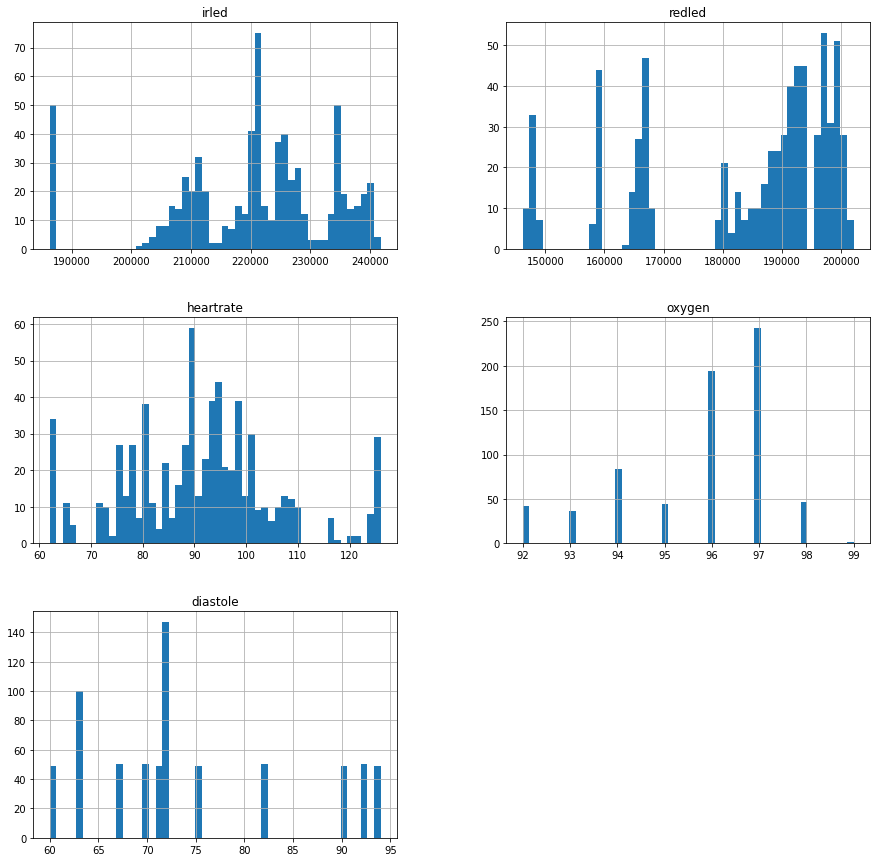

In [ ]:
df.hist(bins=50, figsize=(15,15))
plt.show()

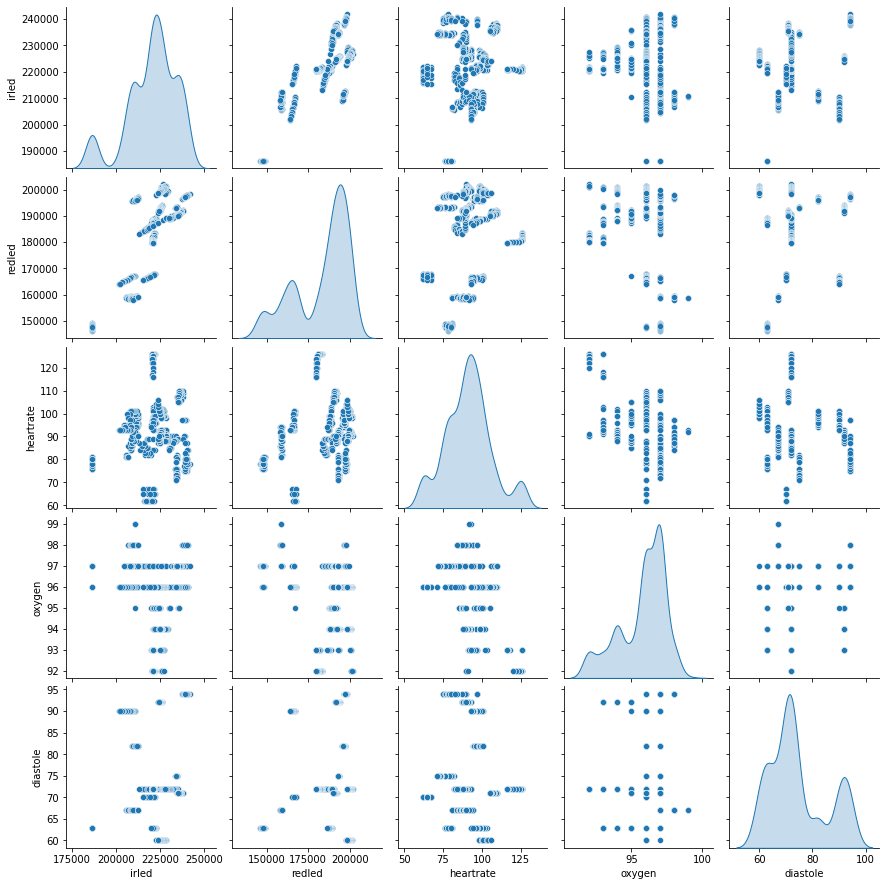

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

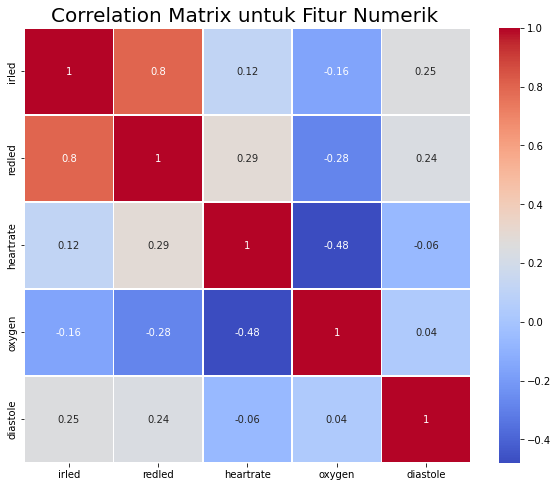

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [ ]:
X = df.drop(["diastole"],axis =1)
y = df["diastole"]

In [ ]:
numerical_features = ['irled', 'redled', 'heartrate', 'oxygen']
scaler = MinMaxScaler()
scaler.fit(X[numerical_features])
X[numerical_features] = scaler.transform(X.loc[:, numerical_features])
X[numerical_features].head()

,irled,redled,heartrate,oxygen
0,0.619977,0.762013,0.640625,0.142857
1,0.620824,0.763176,0.625000,0.142857
2,0.620878,0.761154,0.625000,0.285714
3,0.621328,0.761548,0.609375,0.285714
4,0.619797,0.765037,0.609375,0.428571


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(553, 4) (553,) (139, 4) (139,)


In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 692
Total # of sample in train dataset: 553
Total # of sample in test dataset: 139


In [ ]:
x_val = X_train[-139:]
y_val = y_train[-139:]

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(4,1)))
model.add(Conv1D(64, 2, activation="relu"))
model.add(Conv1D(128, 2, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             96        
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             4160      
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            16512     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 37,409
Trainable params: 37,409
Non-traina

In [ ]:
model.compile(loss='mean_squared_logarithmic_error',
              optimizer=tf.optimizers.Adam(learning_rate=1.000e-4),
              metrics=['mae'])

In [ ]:
minMAE = (df['diastole'].max() - df['diastole'].min()) * 0.1
minMAE

3.4000000000000004

In [ ]:
minMAE = 0.4
minMAE

0.4

In [ ]:
class TestCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('mae') < minMAE):
            print("\nmae < 10%!") 
            self.model.stop_training = True 
callbacks = TestCallback()

In [ ]:
%%time
history = model.fit(
    X_train,
    y_train,
    batch_size=16,
    epochs=10000,
    validation_data=(x_val, y_val),
    callbacks = [callbacks]
)


Streaming output truncated to the last 5000 lines.
Epoch 2375/10000
35/35 [==============================] - 0s 7ms/step - loss: 2.3111e-04 - mae: 0.8123 - val_loss: 1.5981e-04 - val_mae: 0.6770
Epoch 2376/10000
35/35 [==============================] - 0s 7ms/step - loss: 2.2995e-04 - mae: 0.8430 - val_loss: 2.4007e-04 - val_mae: 0.9457
Epoch 2377/10000
35/35 [==============================] - 0s 7ms/step - loss: 2.8479e-04 - mae: 0.9275 - val_loss: 1.4528e-04 - val_mae: 0.6265
Epoch 2378/10000
35/35 [==============================] - 0s 7ms/step - loss: 2.5475e-04 - mae: 0.8682 - val_loss: 1.7615e-04 - val_mae: 0.7627
Epoch 2379/10000
35/35 [==============================] - 0s 9ms/step - loss: 2.7406e-04 - mae: 0.9193 - val_loss: 1.4798e-04 - val_mae: 0.6341
Epoch 2380/10000
35/35 [==============================] - 0s 8ms/step - loss: 2.6504e-04 - mae: 0.8932 - val_loss: 1.7428e-04 - val_mae: 0.7315
Epoch 2381/10000
35/35 [==============================] - 0s 8ms/step - loss: 2.3718e

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.05])
  plt.xlabel('Epoch')
  plt.ylabel('Error [diastole]')
  plt.legend()
  plt.grid(True)

In [ ]:
def plot_mae(history):
  plt.plot(history.history['mae'], label='mae')
  plt.plot(history.history['val_mae'], label='val_mae')
  plt.ylim([0, 70])
  plt.xlabel('Epoch')
  plt.ylabel('Error [diastole]')
  plt.legend()
  plt.grid(True)

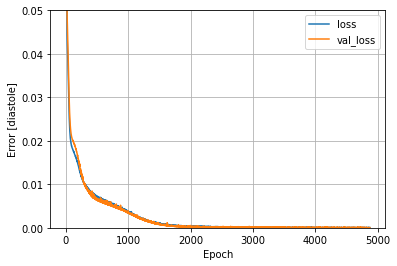

In [ ]:
plot_loss(history)

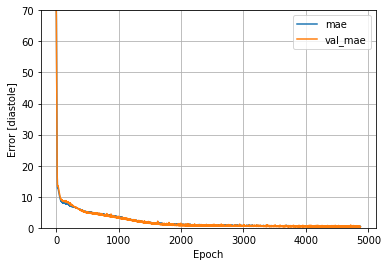

In [ ]:
plot_mae(history)

In [ ]:
y_test[0:101]

381    72
664    75
257    67
338    94
319    94
       ..
164    63
512    70
549    90
673    75
500    70
Name: diastole, Length: 101, dtype: int64

In [ ]:
scaler = MinMaxScaler()
train = scaler.fit_transform(X[numerical_features])
predict = scaler.transform(X[numerical_features])
predictions = model.predict(predict)
print("X=%s, Predicted=%s" % (predict[0:700], predictions[0:700]))

22/22 [==============================] - 0s 4ms/step
X=[[0.61997717 0.76201299 0.640625   0.14285714]
 [0.62082355 0.76317626 0.625      0.14285714]
 [0.62087757 0.76115396 0.625      0.28571429]
 ...
 [0.87063053 0.84048893 0.15625    0.71428571]
 [0.86508406 0.83767919 0.140625   0.57142857]
 [0.86494    0.83755391 0.140625   0.57142857]], Predicted=[[63.140564]
 [63.117985]
 [61.72639 ]
 [62.228268]
 [63.275455]
 [63.27759 ]
 [62.569   ]
 [62.548016]
 [62.815918]
 [62.61527 ]
 [62.63632 ]
 [63.327557]
 [63.88641 ]
 [63.91832 ]
 [63.513336]
 [62.535122]
 [62.53223 ]
 [64.350685]
 [62.55193 ]
 [62.504623]
 [62.91624 ]
 [63.155415]
 [63.128727]
 [62.814896]
 [62.82951 ]
 [62.842022]
 [63.03018 ]
 [63.18671 ]
 [63.156178]
 [63.12459 ]
 [63.06904 ]
 [63.06854 ]
 [63.000366]
 [62.97038 ]
 [63.016495]
 [63.025642]
 [63.078857]
 [62.32393 ]
 [62.151413]
 [61.935112]
 [61.924824]
 [61.424007]
 [63.544876]
 [63.630913]
 [63.368557]
 [63.39627 ]
 [63.380367]
 [63.197575]
 [63.112713]
 [61.8371

In [ ]:
data =pd.DataFrame(predictions[0:700])
from google.colab import files
data.to_csv('results.csv', encoding = 'utf-8-sig') 
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results = {}
results['model'] = model.evaluate(X, y, verbose=1)

22/22 [==============================] - 0s 6ms/step - loss: 5.4916e-05 - mae: 0.4211


In [ ]:
!mkdir -p saved_model
model.save('saved/diastole_model.h5')

In [ ]:
from keras.models import load_model
load_model('saved/diastole_model.h5')

In [ ]:
reloaded = tf.keras.models.load_model('saved/diastole_model.h5')

results['reloaded'] = reloaded.evaluate(
    X, y, verbose=1)

22/22 [==============================] - 0s 2ms/step - loss: 5.4916e-05 - mae: 0.4211


In [ ]:
pd.DataFrame(results, index=['Loss', 'Mean Absolute Error']).T

,Loss,Mean Absolute Error
model,0.000055,0.421084
reloaded,0.000055,0.421084


In [ ]:
test = model.predict(X[0:700])
ypred = np.array(test)

22/22 [==============================] - 0s 3ms/step


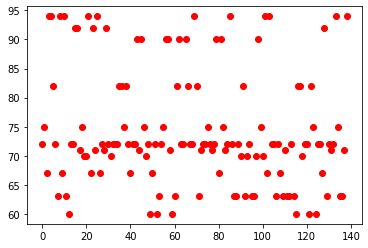

In [ ]:
ytest = np.array(y_test[0:700])
plt.plot(ytest, 'ro')
plt.show()

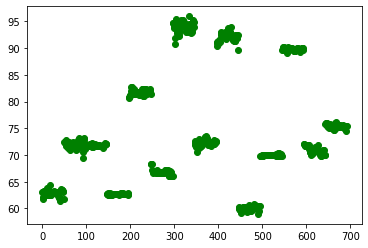

In [ ]:
plt.plot(ypred, 'go')
plt.show()